## Importing Dataset and Data Preprocessing

In [1]:
# Import packages and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
import os
import re
import time

master_tm = time.time()
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from IPython.core.display import display, HTML
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from matplotlib import cm

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.cluster import KMeans

try:
    import pydot
except:
    !pip install pydot
    import pydot

df = pd.read_excel('Bike_Sharing2.xlsx')
df

S_No    index                Time       Date  season  yr  mnth  hr  \
0          1      1.0 2011-01-01 00:00:00 2011-01-01       1   0     1   0   
1          2      2.0 2011-01-01 01:00:00 2011-01-01       1   0     1   1   
2          3      3.0 2011-01-01 02:00:00 2011-01-01       1   0     1   2   
3          4      4.0 2011-01-01 03:00:00 2011-01-01       1   0     1   3   
4          5      5.0 2011-01-01 04:00:00 2011-01-01       1   0     1   4   
...      ...      ...                 ...        ...     ...  ..   ...  ..   
17539  17540  17375.0 2012-12-31 19:00:00 2012-12-31       1   1    12  19   
17540  17541  17376.0 2012-12-31 20:00:00 2012-12-31       1   1    12  20   
17541  17542  17377.0 2012-12-31 21:00:00 2012-12-31       1   1    12  21   
17542  17543  17378.0 2012-12-31 22:00:00 2012-12-31       1   1    12  22   
17543  17544  17379.0 2012-12-31 23:00:00 2012-12-31       1   1    12  23   

       holiday  weekday  workingday  weathersit  temp   atemp   hum  \
0            0        6           0         1.0  0.24  0.2879  0.81   
1            0        6           0         1.0  0.22  0.2727  0.80   
2            0        6           0         1.0  0.22  0.2727  0.80   
3            0        6           0         1.0  0.24  0.2879  0.75   
4            0        6           0         1.0  0.24  0.2879  0.75   
...        ...      ...         ...         ...   ...     ...   ...   
17539        0        1           1         2.0  0.26  0.2576  0.60   
17540        0        1           1         2.0  0.26  0.2576  0.60   
17541        0        1           1         1.0  0.26  0.2576  0.60   
17542        0        1           1         1.0  0.26  0.2727  0.56   
17543        0        1           1         1.0  0.26  0.2727  0.65   

       windspeed  casual  registered  
0         0.0000     3.0        13.0  
1         0.0000     8.0        32.0  
2         0.0000     5.0        27.0  
3         0.0000     3.0        10.0  
4         0.0000     0.0         1.0  
...          ...     ...         ...  
17539     0.1642    11.0       108.0  
17540     0.1642     8.0        81.0  
17541     0.1642     7.0        83.0  
17542     0.1343    13.0        48.0  
17543     0.1343    12.0        37.0  

[17544 rows x 18 columns]

In [2]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   S_No        17544 non-null  int64         
 1   index       17379 non-null  float64       
 2   Time        17544 non-null  datetime64[ns]
 3   Date        17379 non-null  datetime64[ns]
 4   season      17544 non-null  int64         
 5   yr          17544 non-null  int64         
 6   mnth        17544 non-null  int64         
 7   hr          17544 non-null  int64         
 8   holiday     17544 non-null  int64         
 9   weekday     17544 non-null  int64         
 10  workingday  17544 non-null  int64         
 11  weathersit  17379 non-null  float64       
 12  temp        17379 non-null  float64       
 13  atemp       17379 non-null  float64       
 14  hum         17379 non-null  float64       
 15  windspeed   17379 non-null  float64       
 16  casual      17379 non-

S_No       index        season            yr          mnth  \
count  17544.000000  17379.0000  17544.000000  17544.000000  17544.000000   
mean    8772.500000   8690.0000      2.496580      0.500684      6.519836   
std     5064.660897   5017.0295      1.110079      0.500014      3.449649   
min        1.000000      1.0000      1.000000      0.000000      1.000000   
25%     4386.750000   4345.5000      2.000000      0.000000      4.000000   
50%     8772.500000   8690.0000      3.000000      1.000000      7.000000   
75%    13158.250000  13034.5000      3.000000      1.000000     10.000000   
max    17544.000000  17379.0000      4.000000      1.000000     12.000000   

                 hr       holiday       weekday    workingday    weathersit  \
count  17544.000000  17544.000000  17544.000000  17544.000000  17379.000000   
mean      11.500000      0.028728      2.997264      0.683995      1.425283   
std        6.922384      0.167045      2.003472      0.464928      0.639357   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        5.750000      0.000000      1.000000      0.000000      1.000000   
50%       11.500000      0.000000      3.000000      1.000000      1.000000   
75%       17.250000      0.000000      5.000000      1.000000      2.000000   
max       23.000000      1.000000      6.000000      1.000000      4.000000   

               temp         atemp           hum     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987      0.475775      0.627229      0.190098     35.676218   
std        0.192556      0.171850      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000      0.333300      0.480000      0.104500      4.000000   
50%        0.500000      0.484800      0.630000      0.194000     17.000000   
75%        0.660000      0.621200      0.780000      0.253700     48.000000   
max        1.000000      1.000000      1.000000      0.850700    367.000000   

         registered  
count  17379.000000  
mean     153.786869  
std      151.357286  
min        0.000000  
25%       34.000000  
50%      115.000000  
75%      220.000000  
max      886.000000

In [3]:
## Data Cleaning
df.drop(columns=['S_No','index','Date'],inplace=True)

# Rename column names for readability
df.rename(columns= {'Time':'time',
                    'yr':'year',
                    'mnth':'month',
                    'hr':'hour',
                    'holiday':'is_holiday',
                    'weekday':'day_of_week',
                    'workingday':'is_working_day',
                    'weathersit':'weather_type',
                    'atemp':'app_temp',
                    'hum':'humidity',
                    'windspeed':'wind_speed'}, inplace=True)

# Formatting and extracting datetime data
df.insert(4, 'day', df['time'].dt.day)
print(df.isna().sum())

df_master = df.copy()
df_master

time                0
season              0
year                0
month               0
day                 0
hour                0
is_holiday          0
day_of_week         0
is_working_day      0
weather_type      165
temp              165
app_temp          165
humidity          165
wind_speed        165
casual            165
registered        165
dtype: int64


time  season  year  month  day  hour  is_holiday  \
0     2011-01-01 00:00:00       1     0      1    1     0           0   
1     2011-01-01 01:00:00       1     0      1    1     1           0   
2     2011-01-01 02:00:00       1     0      1    1     2           0   
3     2011-01-01 03:00:00       1     0      1    1     3           0   
4     2011-01-01 04:00:00       1     0      1    1     4           0   
...                   ...     ...   ...    ...  ...   ...         ...   
17539 2012-12-31 19:00:00       1     1     12   31    19           0   
17540 2012-12-31 20:00:00       1     1     12   31    20           0   
17541 2012-12-31 21:00:00       1     1     12   31    21           0   
17542 2012-12-31 22:00:00       1     1     12   31    22           0   
17543 2012-12-31 23:00:00       1     1     12   31    23           0   

       day_of_week  is_working_day  weather_type  temp  app_temp  humidity  \
0                6               0           1.0  0.24    0.2879      0.81   
1                6               0           1.0  0.22    0.2727      0.80   
2                6               0           1.0  0.22    0.2727      0.80   
3                6               0           1.0  0.24    0.2879      0.75   
4                6               0           1.0  0.24    0.2879      0.75   
...            ...             ...           ...   ...       ...       ...   
17539            1               1           2.0  0.26    0.2576      0.60   
17540            1               1           2.0  0.26    0.2576      0.60   
17541            1               1           1.0  0.26    0.2576      0.60   
17542            1               1           1.0  0.26    0.2727      0.56   
17543            1               1           1.0  0.26    0.2727      0.65   

       wind_speed  casual  registered  
0          0.0000     3.0        13.0  
1          0.0000     8.0        32.0  
2          0.0000     5.0        27.0  
3          0.0000     3.0        10.0  
4          0.0000     0.0         1.0  
...           ...     ...         ...  
17539      0.1642    11.0       108.0  
17540      0.1642     8.0        81.0  
17541      0.1642     7.0        83.0  
17542      0.1343    13.0        48.0  
17543      0.1343    12.0        37.0  

[17544 rows x 16 columns]

## Regression Analysis

### Regression Data Preparation

In [4]:
# Further Data Cleaning
df_regression = df.copy()
df_regression.dropna(axis=0, how='any', inplace=True)
df_regression.reset_index(drop=True, inplace=True)
df_regression['total_users'] = df_regression['casual'] + df_regression['registered']
df_regression.drop(columns=['casual',
                            'registered'], inplace=True)

df_regression['weather_type'] = df_regression['weather_type'].astype('int64')

print(df_regression.isna().sum())
df_regression

time              0
season            0
year              0
month             0
day               0
hour              0
is_holiday        0
day_of_week       0
is_working_day    0
weather_type      0
temp              0
app_temp          0
humidity          0
wind_speed        0
total_users       0
dtype: int64


time  season  year  month  day  hour  is_holiday  \
0     2011-01-01 00:00:00       1     0      1    1     0           0   
1     2011-01-01 01:00:00       1     0      1    1     1           0   
2     2011-01-01 02:00:00       1     0      1    1     2           0   
3     2011-01-01 03:00:00       1     0      1    1     3           0   
4     2011-01-01 04:00:00       1     0      1    1     4           0   
...                   ...     ...   ...    ...  ...   ...         ...   
17374 2012-12-31 19:00:00       1     1     12   31    19           0   
17375 2012-12-31 20:00:00       1     1     12   31    20           0   
17376 2012-12-31 21:00:00       1     1     12   31    21           0   
17377 2012-12-31 22:00:00       1     1     12   31    22           0   
17378 2012-12-31 23:00:00       1     1     12   31    23           0   

       day_of_week  is_working_day  weather_type  temp  app_temp  humidity  \
0                6               0             1  0.24    0.2879      0.81   
1                6               0             1  0.22    0.2727      0.80   
2                6               0             1  0.22    0.2727      0.80   
3                6               0             1  0.24    0.2879      0.75   
4                6               0             1  0.24    0.2879      0.75   
...            ...             ...           ...   ...       ...       ...   
17374            1               1             2  0.26    0.2576      0.60   
17375            1               1             2  0.26    0.2576      0.60   
17376            1               1             1  0.26    0.2576      0.60   
17377            1               1             1  0.26    0.2727      0.56   
17378            1               1             1  0.26    0.2727      0.65   

       wind_speed  total_users  
0          0.0000         16.0  
1          0.0000         40.0  
2          0.0000         32.0  
3          0.0000         13.0  
4          0.0000          1.0  
...           ...          ...  
17374      0.1642        119.0  
17375      0.1642         89.0  
17376      0.1642         90.0  
17377      0.1343         61.0  
17378      0.1343         49.0  

[17379 rows x 15 columns]

### Data Visualization

#### Univariate Analysis

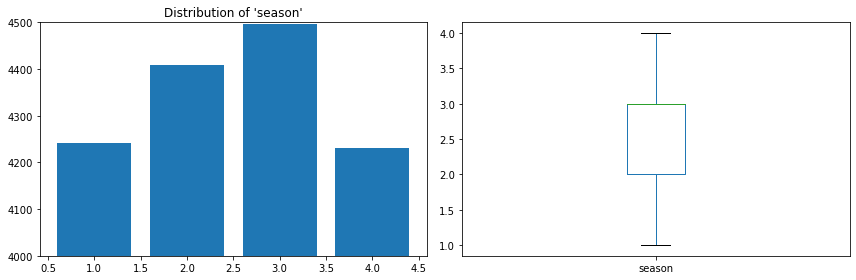

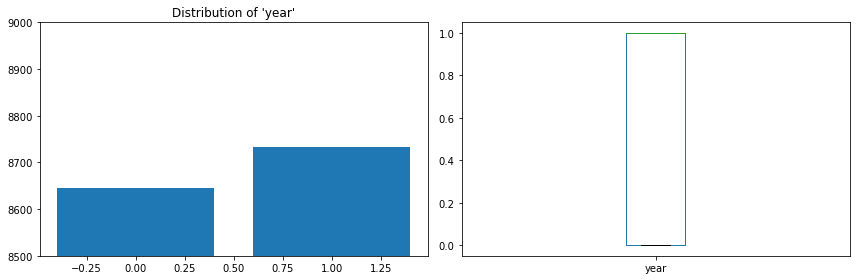

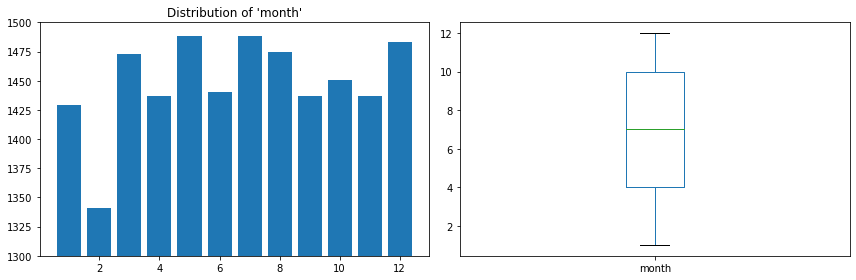

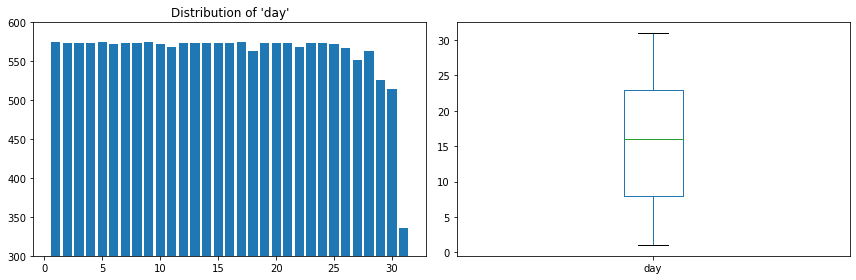

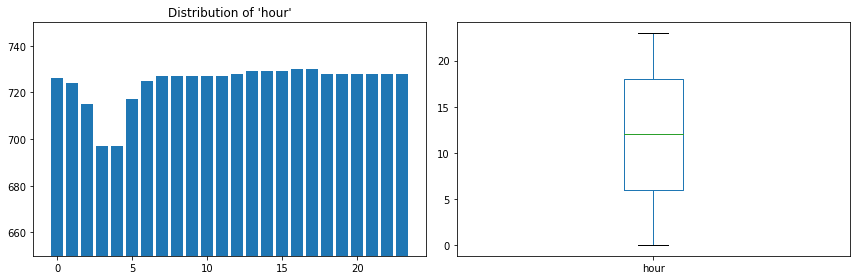

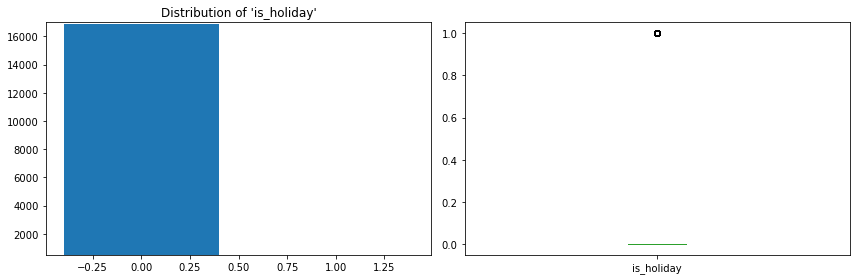

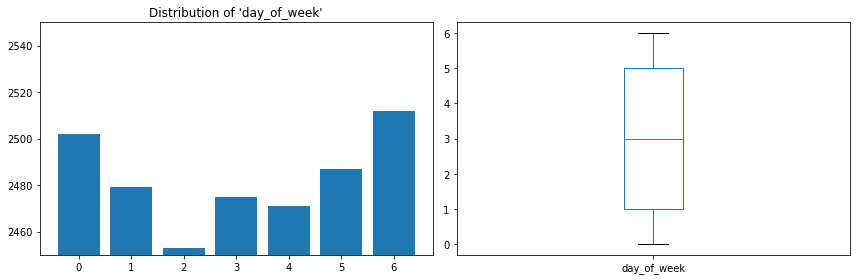

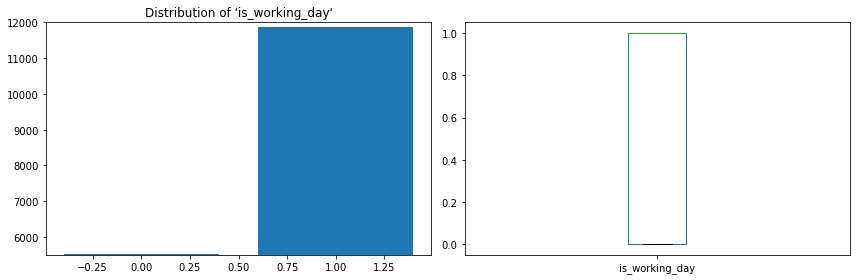

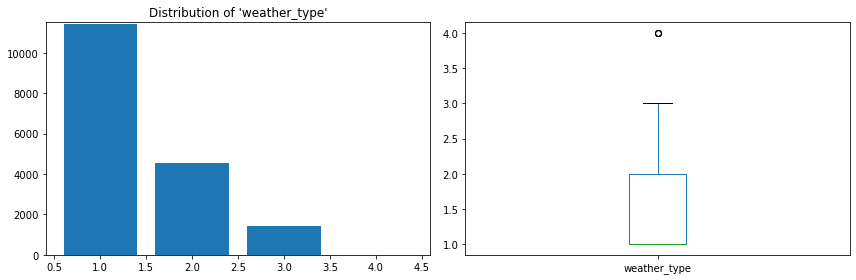

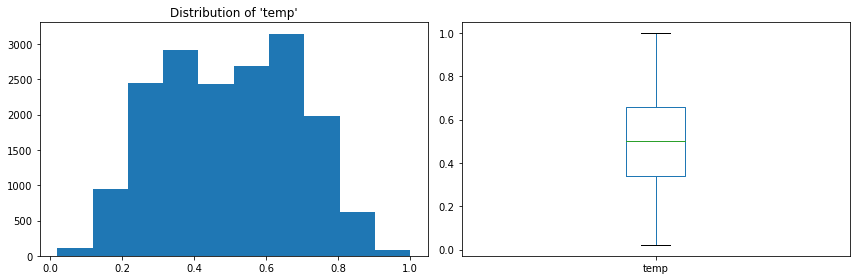

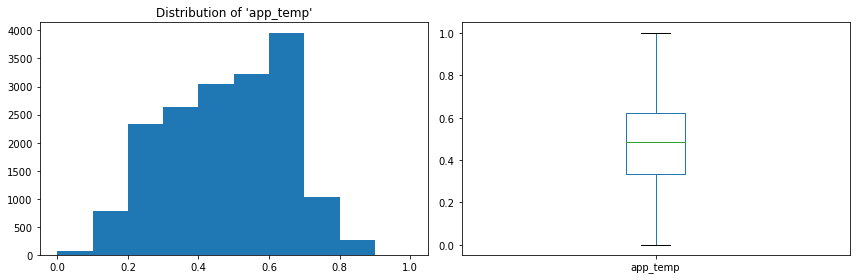

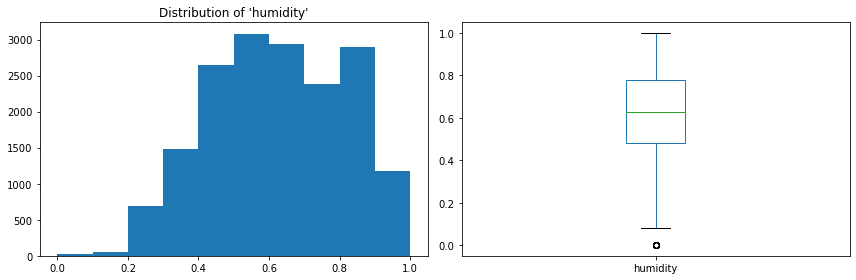

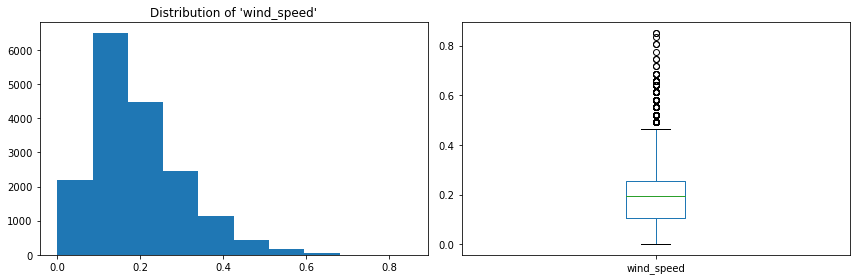

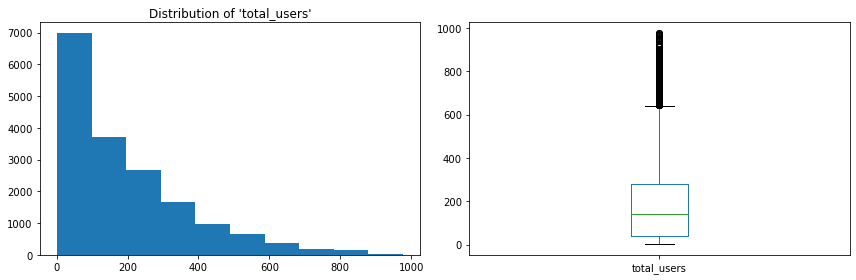

In [5]:
# Univariate Analysis - Understanding distribution and shape of each variable
id_vars = ['time']
num_vars = list(df_regression.columns)[-5:]
cat_vars = list(df_regression.columns)[1:-5]

for col in list(df_regression.columns)[1:]:
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    if col in cat_vars:
        axes[0].bar(x=list(df_regression[col].value_counts().index), 
                    height=list(df_regression[col].value_counts().values))
        if col in ['season','year','week','is_holiday','is_working_day','weather_type']:
            y_min = int(math.floor(np.min(df_regression[col].value_counts())/500))*500
            y_max = int(math.ceil(np.max(df_regression[col].value_counts())/500))*500
            axes[0].set_ylim([y_min, y_max])
        elif col in ['month','day','hour','day_of_week']:
            y_min = int(math.floor(np.min(df_regression[col].value_counts())/50))*50
            y_max = int(math.ceil(np.max(df_regression[col].value_counts())/50))*50
            axes[0].set_ylim([y_min, y_max])
    else:
        df_regression[col].hist(ax = axes[0], grid=False)
    
    axes[0].set_title('Distribution of \''+ col + '\'')
    
    df_regression.boxplot(column = col, ax = axes[1], grid=False)
    plt.tight_layout()
    plt.show()

#### Bivariate Analysis

Runtime: 39.42766332626343 seconds


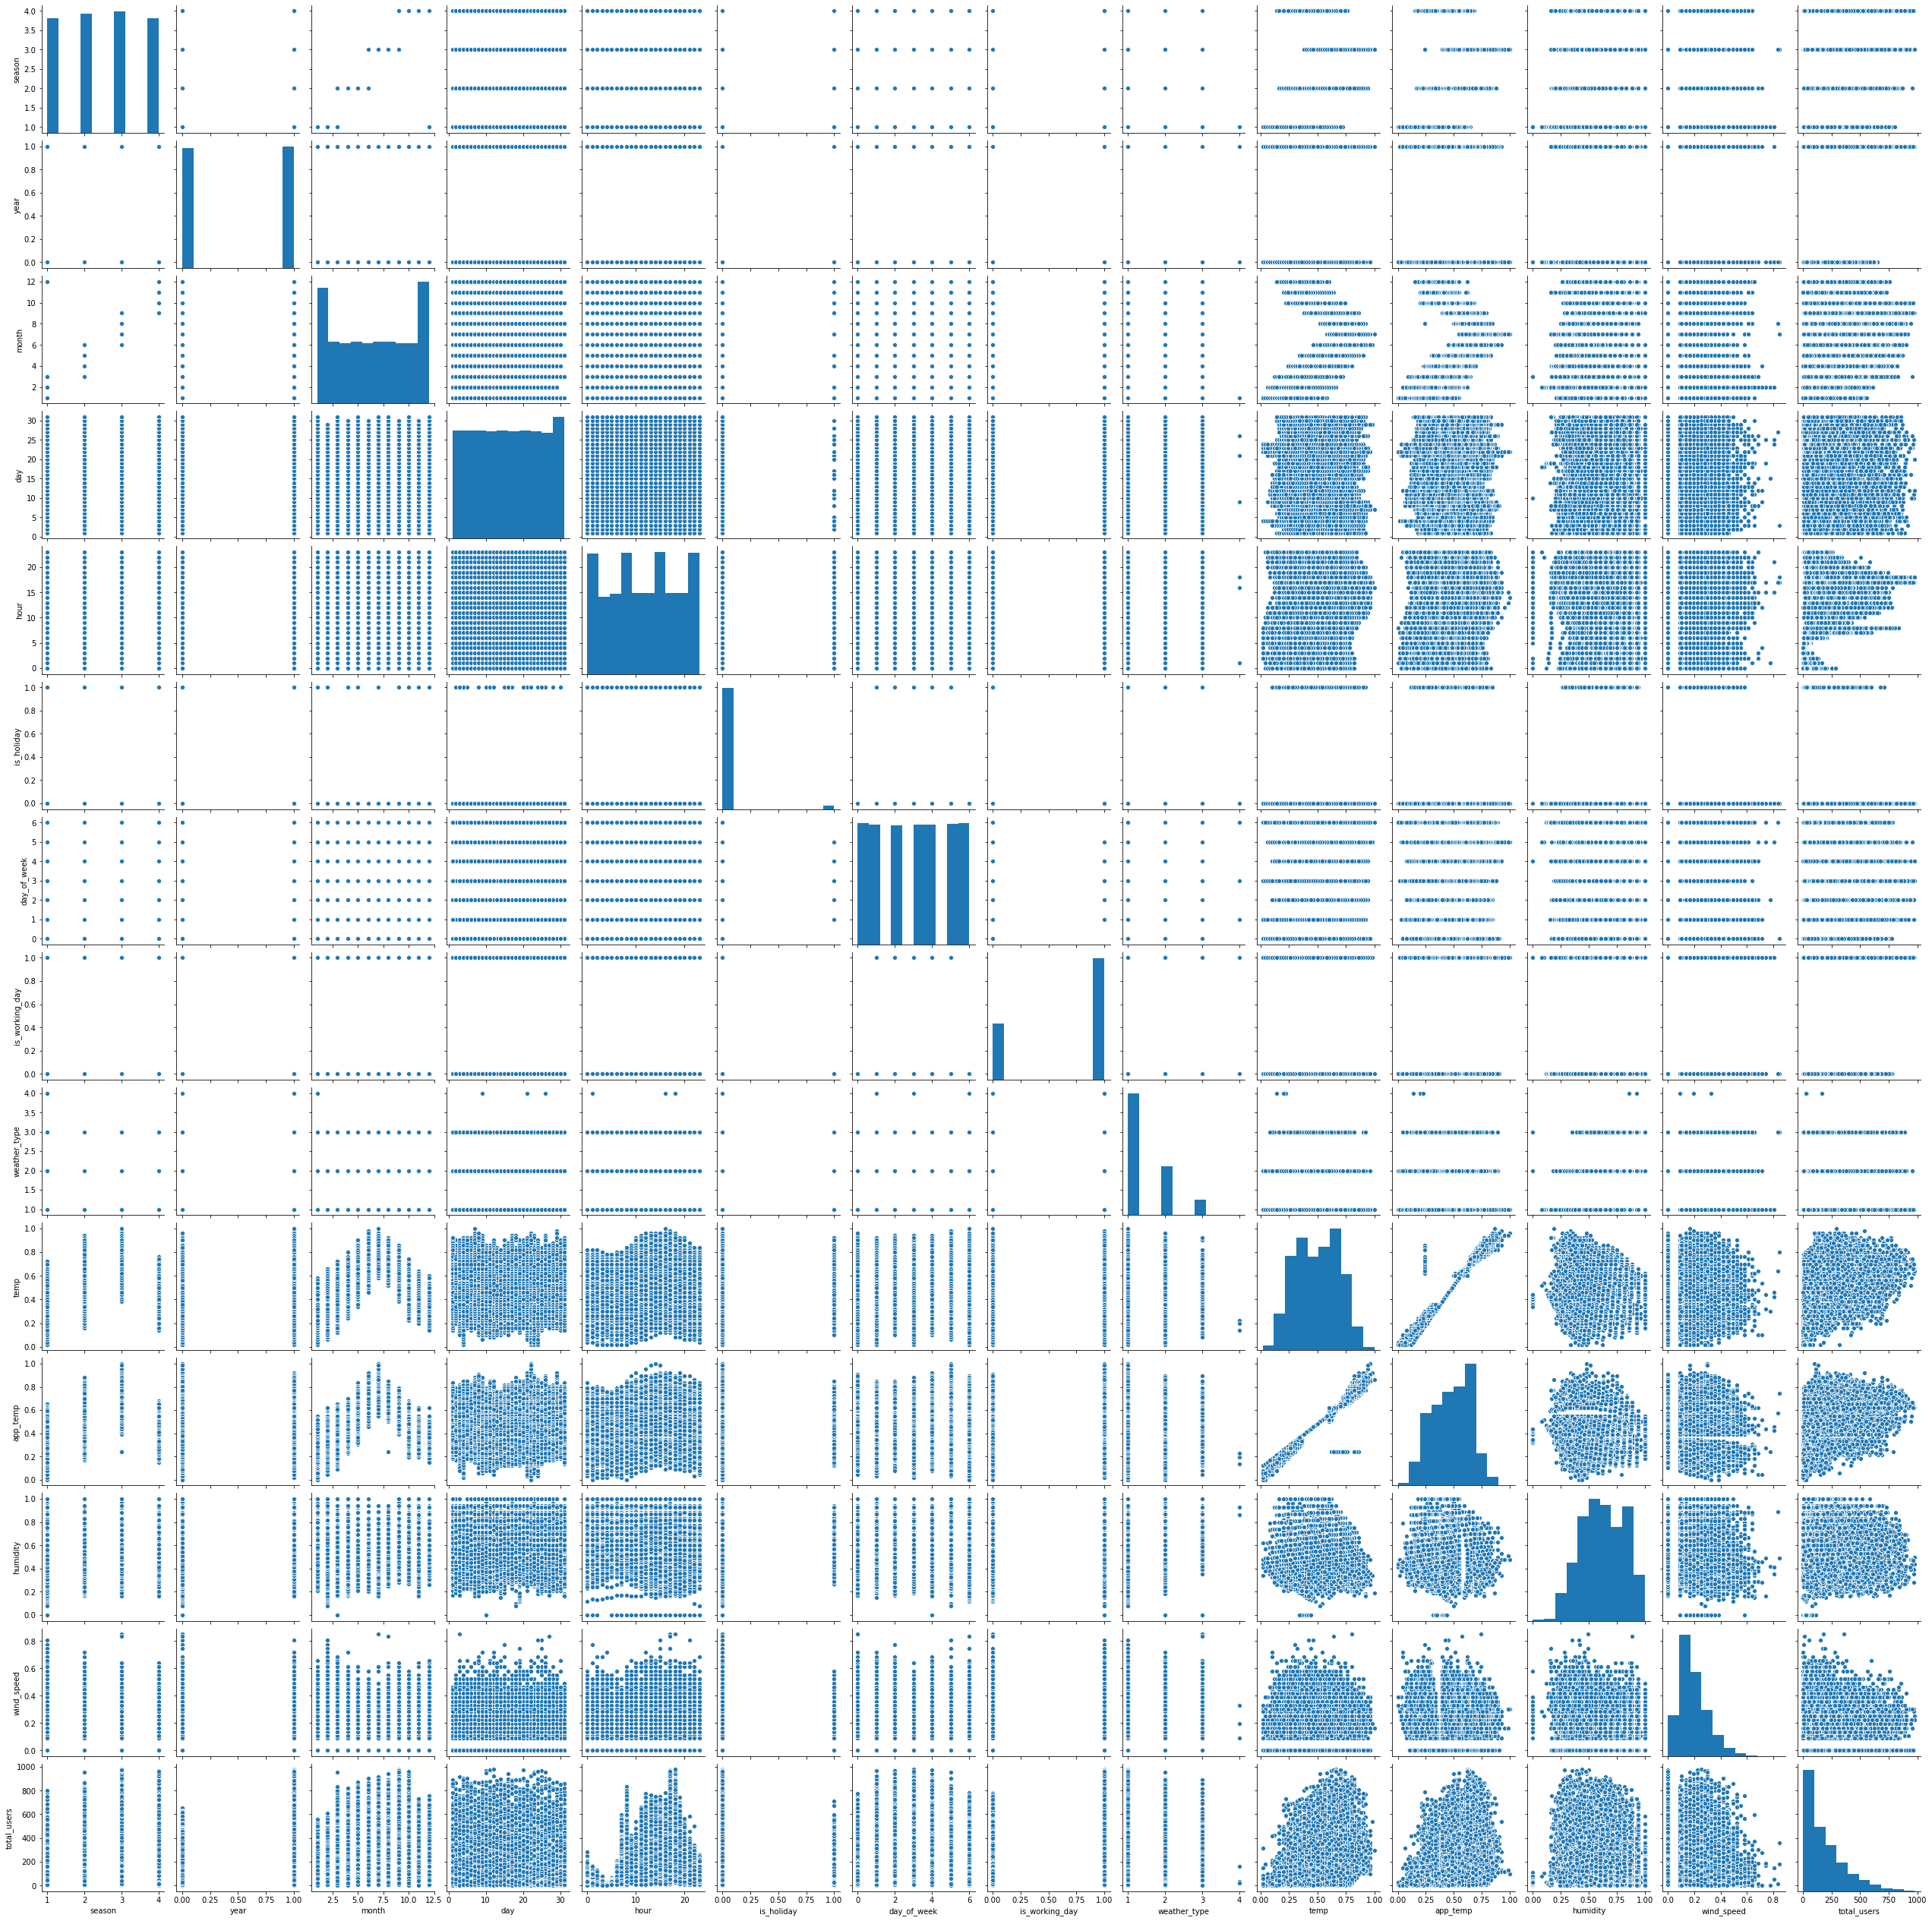

In [6]:
# Bi-Variate Analysis - Understanding pairwise relationships between variables
start = time.time()
sns.pairplot(df_regression.iloc[:,1:])
print('Runtime:',time.time()-start,'seconds')

In [7]:
# Creating categorical dummy variables
quantitative_data = df_regression[num_vars].copy()
categorical_data = df_regression[cat_vars].copy()
categorical_data.astype('category')

dummy = pd.get_dummies(categorical_data, columns=list(categorical_data.columns))
df_regression = pd.concat([quantitative_data,dummy],axis=1)
df_regression = pd.concat([df_regression.pop('total_users'),df_regression], axis=1)
df_regression

total_users  temp  app_temp  humidity  wind_speed  season_1  season_2  \
0             16.0  0.24    0.2879      0.81      0.0000         1         0   
1             40.0  0.22    0.2727      0.80      0.0000         1         0   
2             32.0  0.22    0.2727      0.80      0.0000         1         0   
3             13.0  0.24    0.2879      0.75      0.0000         1         0   
4              1.0  0.24    0.2879      0.75      0.0000         1         0   
...            ...   ...       ...       ...         ...       ...       ...   
17374        119.0  0.26    0.2576      0.60      0.1642         1         0   
17375         89.0  0.26    0.2576      0.60      0.1642         1         0   
17376         90.0  0.26    0.2576      0.60      0.1642         1         0   
17377         61.0  0.26    0.2727      0.56      0.1343         1         0   
17378         49.0  0.26    0.2727      0.65      0.1343         1         0   

       season_3  season_4  year_0  ...  day_of_week_3  day_of_week_4  \
0             0         0       1  ...              0              0   
1             0         0       1  ...              0              0   
2             0         0       1  ...              0              0   
3             0         0       1  ...              0              0   
4             0         0       1  ...              0              0   
...         ...       ...     ...  ...            ...            ...   
17374         0         0       0  ...              0              0   
17375         0         0       0  ...              0              0   
17376         0         0       0  ...              0              0   
17377         0         0       0  ...              0              0   
17378         0         0       0  ...              0              0   

       day_of_week_5  day_of_week_6  is_working_day_0  is_working_day_1  \
0                  0              1                 1                 0   
1                  0              1                 1                 0   
2                  0              1                 1                 0   
3                  0              1                 1                 0   
4                  0              1                 1                 0   
...              ...            ...               ...               ...   
17374              0              0                 0                 1   
17375              0              0                 0                 1   
17376              0              0                 0                 1   
17377              0              0                 0                 1   
17378              0              0                 0                 1   

       weather_type_1  weather_type_2  weather_type_3  weather_type_4  
0                   1               0               0               0  
1                   1               0               0               0  
2                   1               0               0               0  
3                   1               0               0               0  
4                   1               0               0               0  
...               ...             ...             ...             ...  
17374               0               1               0               0  
17375               0               1               0               0  
17376               1               0               0               0  
17377               1               0               0               0  
17378               1               0               0               0  

[17379 rows x 93 columns]

#### Correlation Matrix (Heatmap)

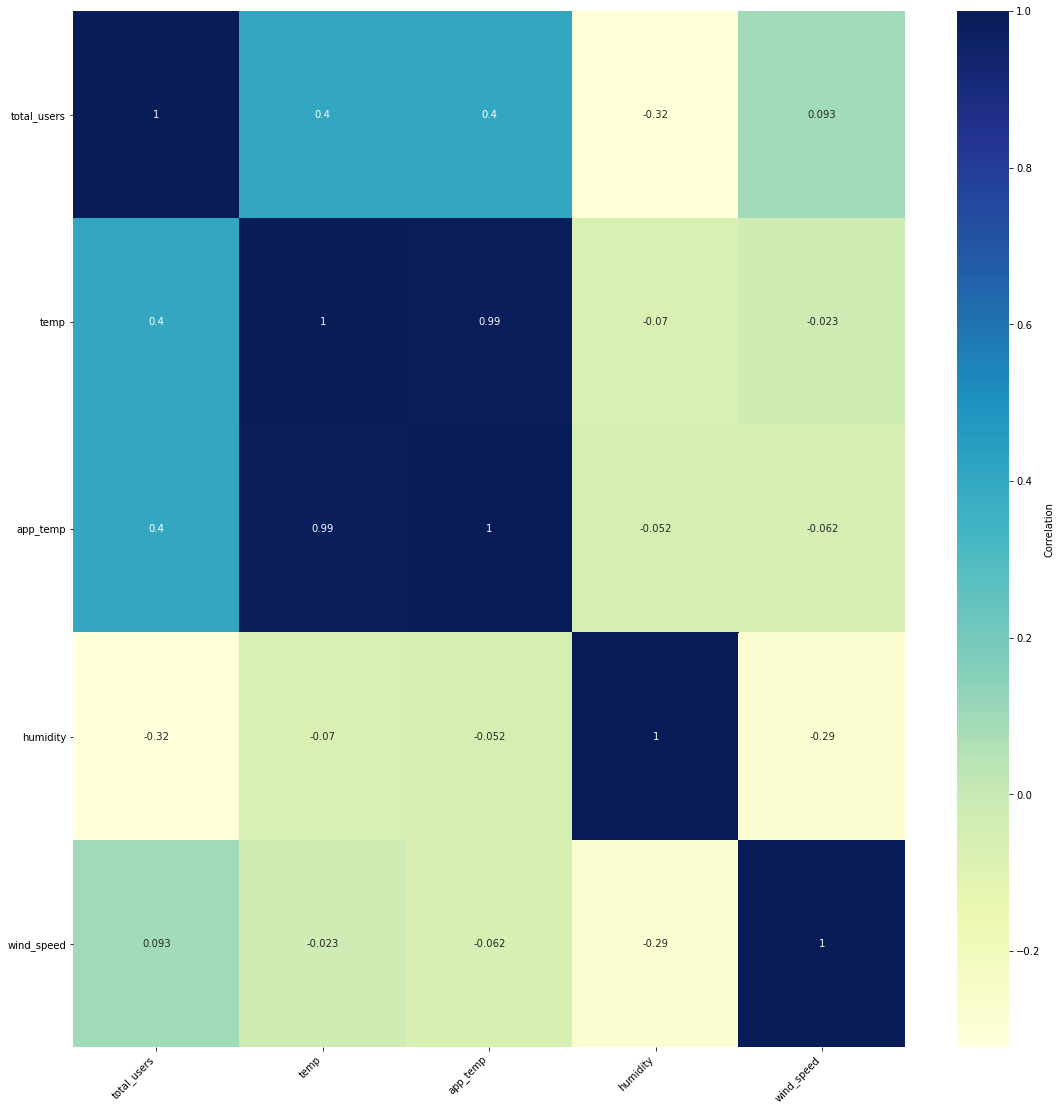

<Figure size 432x288 with 0 Axes>

In [8]:
# Correlation Matrix (Heatmap)
corr = df_regression.iloc[:,:5].corr(method='pearson')

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="YlGnBu",cbar_kws={'label': 'Correlation'})
plt.tight_layout()
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)

plt.show()
plt.clf()

In [9]:
# Dropping highly correlated apparent temperature variable
df_regression.drop(columns=['app_temp'], inplace=True)
df_regression

total_users  temp  humidity  wind_speed  season_1  season_2  season_3  \
0             16.0  0.24      0.81      0.0000         1         0         0   
1             40.0  0.22      0.80      0.0000         1         0         0   
2             32.0  0.22      0.80      0.0000         1         0         0   
3             13.0  0.24      0.75      0.0000         1         0         0   
4              1.0  0.24      0.75      0.0000         1         0         0   
...            ...   ...       ...         ...       ...       ...       ...   
17374        119.0  0.26      0.60      0.1642         1         0         0   
17375         89.0  0.26      0.60      0.1642         1         0         0   
17376         90.0  0.26      0.60      0.1642         1         0         0   
17377         61.0  0.26      0.56      0.1343         1         0         0   
17378         49.0  0.26      0.65      0.1343         1         0         0   

       season_4  year_0  year_1  ...  day_of_week_3  day_of_week_4  \
0             0       1       0  ...              0              0   
1             0       1       0  ...              0              0   
2             0       1       0  ...              0              0   
3             0       1       0  ...              0              0   
4             0       1       0  ...              0              0   
...         ...     ...     ...  ...            ...            ...   
17374         0       0       1  ...              0              0   
17375         0       0       1  ...              0              0   
17376         0       0       1  ...              0              0   
17377         0       0       1  ...              0              0   
17378         0       0       1  ...              0              0   

       day_of_week_5  day_of_week_6  is_working_day_0  is_working_day_1  \
0                  0              1                 1                 0   
1                  0              1                 1                 0   
2                  0              1                 1                 0   
3                  0              1                 1                 0   
4                  0              1                 1                 0   
...              ...            ...               ...               ...   
17374              0              0                 0                 1   
17375              0              0                 0                 1   
17376              0              0                 0                 1   
17377              0              0                 0                 1   
17378              0              0                 0                 1   

       weather_type_1  weather_type_2  weather_type_3  weather_type_4  
0                   1               0               0               0  
1                   1               0               0               0  
2                   1               0               0               0  
3                   1               0               0               0  
4                   1               0               0               0  
...               ...             ...             ...             ...  
17374               0               1               0               0  
17375               0               1               0               0  
17376               1               0               0               0  
17377               1               0               0               0  
17378               1               0               0               0  

[17379 rows x 92 columns]

### Linear Regression (with auto feature selection)

In [10]:
df = df_regression.copy()
y = list(df.columns)[0]

rename_columns = {}

for column_name in list(df.columns):
    ## Go through each column name and check if it contains non-alphanumeric
    if re.search('\W', column_name):
        ## Remove non-alphanumeric at the start or end of the column names or replace with '_' if in the middle
        new_name = re.sub('^\W+', '', column_name)
        new_name = re.sub('\W+$', '', new_name)
        rename_columns.update({column_name: re.sub('\W+', '_', new_name)})

df.rename(columns=rename_columns,
          inplace=True)

modeleq = ' + '.join(list(df.columns)).replace('+', '~', 1)
print('\nModel equation:', modeleq, '\n')

maxR2 = -np.inf
bmodeleq = modeleq
numx = df.shape[1] - 1
x1x2 = False #interaction variables not yet included
df2 = df.copy()

#print(ols(modeleq, df).fit().summary2())

while True:
    regout = ols(modeleq, df).fit()
    R2 = regout.rsquared_adj
    
    if R2 > maxR2:
        maxR2 = R2
        bmodeleq = modeleq

    print('\nAdjusted R2 =', R2, 'for', numx, 'Xs.')
   
    if numx == 1:
        print('Variable left:', modeleq[modeleq.find('~') + 2 :])
        if x1x2:
            #one xvar left
            #get out of 'while' loop:
            break
            
        else:
            #add interaction variables for original untransformed variables in best model so far
            
            numx = bmodeleq.count('+') + 1
            print('\nRestarting from best model (with', numx, 'Xs) found so far...')
            
            colname = bmodeleq.replace('~', '+').split(' + ')
            df = df2[colname]
            colname = colname[1:] #remove y
            
                    
            df2 = df.copy()
                    
            #delete any x too highly correlated with another x, to avoid collinearity
            
            corv = pd.DataFrame() #start empty dataframe for corr(Xs, y) to come
            for x in list(df)[1:]:
                #during 1st time thru loop: new column, with label, created in empty dataframe:
                #during subsequent time thru loop: new row, with row label, added to dataframe:
                corv.loc[x, y] = df[x].corr(df[list(df)[0]])
                
            corv = corv.loc[abs(corv).sort_values([y]).index, :] #corr(Xs, y) ranked

            delta = 0.005 #corr difference lower limit
            dl2 = []
            icorr = True
            while icorr:
                a = abs(corv).diff() <= delta #adjacent rows with similar abs(corr(Xs, y))
                colname = list(df)[1:]
                dl = []
                print('\nX pairs with correlations >', 1 - delta, ':')
                for b in range(1, a.shape[0]):
                    if a.iloc[b, 0]:
                        if abs(df[a.index[b - 1]].corr(df[a.index[b]])) > 1 - delta:
                            #deleting 1 X from correlated pair:
                            dv0 = a.index[b - 1]
                            dv1 = a.index[b]

                            #neither should already be deleted:
                            if not (dv0 in dl) and not (dv1 in dl):
                                #delete x with rather lower corr(x, y):
                                if abs(corv.loc[dv0, y]) - abs(corv.loc[dv1, y]) >= delta:
                                    d = dv1
                                elif len(dv0) < len(dv1): #delete x with longer name:
                                    d = dv1
                                else:
                                    d = dv0
                                    
                                dl.append(d) #for en masse deletion later
                                corv.drop([d], axis=0, inplace=True) #delete from column of corr with y

                                print(dv0,',',dv1)
            
                if len(dl) > 0:
                    df.drop(axis=1, columns=dl, inplace=True) #variables deleted en masse
                    dl2 = dl2 + dl #keep for real deletion later
                    print('\n' + str(len(dl)), 'variables considered for deletion:')
                    print('\n'.join([str(x) for x in dl]))
                else:
                    print('(no more)')
                    icorr = False
                    
            dl2 = [x for x in dl2 if x.find('_x_') != -1] #only interaction variables kept
            df2.drop(axis=1, columns=dl2, inplace=True) #collinear interaction variables deleted en masse, for real
            #remaining Xs may be collinear
            print('\n' + str(len(dl2)) + ' interaction variables deleted.')
            
            #potential collinearity issues handled
            
            
            modeleq = ' + '.join(list(df2)).replace('+', '~', 1)
            numx = df2.shape[1] - 1
            x1x2 = True #interaction variables already included
            
            #beyond-pairwise collinearity may still be introduced with the interaction variables
            
            df = df2.copy() #ready for continuing deletion
            continue

    #identify X variable to delete by finding the one with smallest abs(t-stat):
    t = regout.tvalues[1:]
    xdrop = list(t[abs(t) == min(abs(t))].index)[0]
    print('Variable to drop:', xdrop)
    
    df.drop(xdrop, axis=1, inplace=True)
    modeleq = ' + '.join(list(df)).replace('+', '~', 1)
    
    numx = numx - 1

numx = bmodeleq.count('+') + 1
print('\nBest model has', numx, 'Xs:')

out = ols(bmodeleq, df2).fit()
print(out.summary2())


Model equation: total_users ~ temp + humidity + wind_speed + season_1 + season_2 + season_3 + season_4 + year_0 + year_1 + month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + month_12 + day_1 + day_2 + day_3 + day_4 + day_5 + day_6 + day_7 + day_8 + day_9 + day_10 + day_11 + day_12 + day_13 + day_14 + day_15 + day_16 + day_17 + day_18 + day_19 + day_20 + day_21 + day_22 + day_23 + day_24 + day_25 + day_26 + day_27 + day_28 + day_29 + day_30 + day_31 + hour_0 + hour_1 + hour_2 + hour_3 + hour_4 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_17 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23 + is_holiday_0 + is_holiday_1 + day_of_week_0 + day_of_week_1 + day_of_week_2 + day_of_week_3 + day_of_week_4 + day_of_week_5 + day_of_week_6 + is_working_day_0 + is_working_day_1 + weather_type_1 + weather_type_2 + weather_type_3 + weather_type_4 


Adju


Adjusted R2 = 0.6859394778348251 for 69 Xs.
Variable to drop: day_2

Adjusted R2 = 0.6859363613974276 for 68 Xs.
Variable to drop: day_30

Adjusted R2 = 0.6859333581192022 for 67 Xs.
Variable to drop: day_of_week_3

Adjusted R2 = 0.6859259451407438 for 66 Xs.
Variable to drop: day_of_week_4

Adjusted R2 = 0.6859290993719822 for 65 Xs.
Variable to drop: day_23

Adjusted R2 = 0.6859115206057089 for 64 Xs.
Variable to drop: day_5

Adjusted R2 = 0.6858917016908037 for 63 Xs.
Variable to drop: day_19

Adjusted R2 = 0.6858718667860461 for 62 Xs.
Variable to drop: day_31

Adjusted R2 = 0.685850097012868 for 61 Xs.
Variable to drop: day_14

Adjusted R2 = 0.6858228107518651 for 60 Xs.
Variable to drop: day_12

Adjusted R2 = 0.6857972892478064 for 59 Xs.
Variable to drop: day_3

Adjusted R2 = 0.685773165085928 for 58 Xs.
Variable to drop: day_10

Adjusted R2 = 0.6857535190994006 for 57 Xs.
Variable to drop: day_13

Adjusted R2 = 0.6857355903086282 for 56 Xs.
Variable to drop: day_9

Adjusted R2

In [11]:
# Split training and testing set for ols model after variable selection
data = df2.copy()

x1 = data.iloc[:,1:]
y1 = data.iloc[:,0:1]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                                        test_size=0.3,
                                                        shuffle=True,
                                                        random_state=42)

training_set = pd.concat([y1_train, x1_train], axis=1)
training_set

total_users  temp  humidity  wind_speed  season_2  season_3  season_4  \
11229          9.0  0.50      0.42      0.1940         1         0         0   
6334         209.0  0.68      0.79      0.1642         0         0         1   
11060         30.0  0.34      0.36      0.4179         1         0         0   
12346        644.0  0.70      0.34      0.0000         1         0         0   
15437        217.0  0.56      0.52      0.2985         0         0         1   
...            ...   ...       ...         ...       ...       ...       ...   
11284        359.0  0.46      0.88      0.0896         1         0         0   
11964        812.0  0.66      0.34      0.1343         1         0         0   
5390         189.0  0.80      0.43      0.2836         0         1         0   
860          100.0  0.24      0.65      0.4179         0         0         0   
15795        779.0  0.52      0.83      0.1642         0         0         1   

       year_0  year_1  month_1  ...  day_of_week_1  day_of_week_2  \
11229       0       1        0  ...              0              0   
6334        1       0        0  ...              1              0   
11060       0       1        0  ...              0              0   
12346       0       1        0  ...              0              0   
15437       0       1        0  ...              0              0   
...       ...     ...      ...  ...            ...            ...   
11284       0       1        0  ...              0              0   
11964       0       1        0  ...              0              0   
5390        1       0        0  ...              0              0   
860         1       0        0  ...              0              1   
15795       0       1        0  ...              0              0   

       day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  \
11229              1              0              0              0   
6334               0              0              0              0   
11060              1              0              0              0   
12346              0              0              0              0   
15437              1              0              0              0   
...              ...            ...            ...            ...   
11284              0              0              1              0   
11964              0              0              1              0   
5390               1              0              0              0   
860                0              0              0              0   
15795              0              1              0              0   

       is_working_day_0  is_working_day_1  weather_type_1  weather_type_2  
11229                 0                 1               0               1  
6334                  0                 1               0               1  
11060                 0                 1               1               0  
12346                 1                 0               1               0  
15437                 0                 1               1               0  
...                 ...               ...             ...             ...  
11284                 0                 1               1               0  
11964                 0                 1               1               0  
5390                  0                 1               1               0  
860                   0                 1               1               0  
15795                 0                 1               0               1  

[12165 rows x 76 columns]

In [12]:
rmse_comparison = []

reg_eqn = ' + '.join(list(df2.columns)).replace('+', '~', 1)
print('Model equation:\n', reg_eqn)

reg_model = ols(reg_eqn, training_set).fit()
y_pred = reg_model.predict(x1_test)
rmse = np.sqrt(mean_squared_error(y_pred, y1_test))
rmse_comparison.append(rmse)

print('\nRMSE (Linear Regression) =', rmse)

Model equation:
 total_users ~ temp + humidity + wind_speed + season_2 + season_3 + season_4 + year_0 + year_1 + month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_10 + month_11 + month_12 + day_2 + day_3 + day_4 + day_5 + day_6 + day_9 + day_10 + day_11 + day_12 + day_13 + day_14 + day_15 + day_16 + day_17 + day_18 + day_19 + day_20 + day_21 + day_23 + day_30 + day_31 + hour_0 + hour_1 + hour_2 + hour_5 + hour_6 + hour_7 + hour_8 + hour_9 + hour_10 + hour_11 + hour_12 + hour_13 + hour_14 + hour_15 + hour_16 + hour_17 + hour_18 + hour_19 + hour_20 + hour_21 + hour_22 + hour_23 + is_holiday_0 + is_holiday_1 + day_of_week_0 + day_of_week_1 + day_of_week_2 + day_of_week_3 + day_of_week_4 + day_of_week_5 + day_of_week_6 + is_working_day_0 + is_working_day_1 + weather_type_1 + weather_type_2

RMSE (Linear Regression) = 100.55924534210169


### Linear Regression

In [13]:
# Split training and testing set for the remaining regression models
data = df_regression.copy()

x = data.iloc[:,1:]
y = data.iloc[:,0:1]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    shuffle=True, 
                                                    random_state=42)

In [14]:
linear_regr = LinearRegression(fit_intercept=True,
                               normalize=False, 
                               copy_X=True, 
                               n_jobs=-1)

linear_regr.fit(x_train, y_train)
y_pred = linear_regr.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse_comparison.append(rmse)

print('RMSE (Linear Regression) =',rmse)

RMSE (Linear Regression) = 100.61777150034399


### Lasso Regression

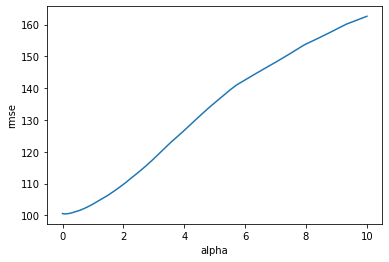

Best alpha = 0.07
Best RMSE (Lasso Regression) = 100.47701590657323


In [15]:
alpha = np.linspace(0,10,1001)
rmse_all = []

for i in alpha:
    lasso_regr = Lasso(alpha=i, 
                       fit_intercept=True,
                       normalize=False,
                       copy_X=True,
                       max_iter=100,
                       tol=0.01,
                       random_state=42)
    lasso_regr.fit(x_train, y_train)
    y_pred = lasso_regr.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_test))
    rmse_all.append(rmse)

index = np.argmin(rmse_all)
best_alpha = alpha[index]
best_rmse = rmse_all[index]
rmse_comparison.append(best_rmse)

plt.plot(alpha, rmse_all)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

print('Best alpha =', best_alpha)
print('Best RMSE (Lasso Regression) =', best_rmse)

### Ridge Regression

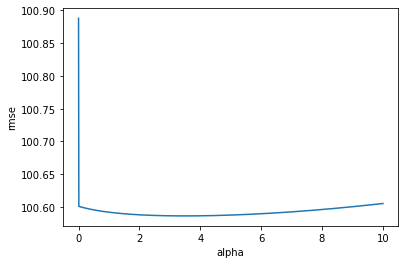

Best alpha = 3.49
Best RMSE (Ridge Regression) = 100.58650824422048


In [16]:
alpha = np.linspace(0,10,1001)
rmse_all = []

for i in alpha:
    ridge_regr = Ridge(alpha=i,
                       fit_intercept=True,
                       normalize=False,
                       copy_X=True,
                       max_iter=100,
                       tol=0.01,
                       random_state=42)
    ridge_regr.fit(x_train, y_train)
    y_pred = ridge_regr.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_pred, y_test))
    rmse_all.append(rmse)

index = np.argmin(rmse_all)
best_alpha = alpha[index]
best_rmse = rmse_all[index]
rmse_comparison.append(best_rmse)

plt.plot(alpha, rmse_all)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

print('Best alpha =', best_alpha)
print('Best RMSE (Ridge Regression) =', best_rmse)

### ElasticNet Regression

In [17]:
enet_tm = time.time()

alpha = np.linspace(0,5,501)
ratio = np.linspace(0,1,11)

best_alpha = None
best_ratio = None
best_rmse = 1e+8

for i in alpha:
    for j in ratio:
        elastic_net = ElasticNet(alpha=i,
                                 l1_ratio=j,
                                 fit_intercept=True,
                                 normalize=False,
                                 max_iter=100,
                                 tol=0.01,
                                 copy_X=True,
                                 random_state=42)
        elastic_net.fit(x_train, y_train)
        y_pred = elastic_net.predict(x_test)
        rmse = np.sqrt(mean_squared_error(y_pred, y_test))

        if rmse < best_rmse:
            best_alpha = i
            best_ratio = j
            best_rmse = rmse

rmse_comparison.append(best_rmse)

print('Best alpha =', best_alpha)
print('Best ratio =', best_ratio)
print('Best RMSE (Elastic Net) =', best_rmse)
print('Runtime:', round((time.time()-enet_tm)/60,2), 'mins')

Best alpha = 0.07
Best ratio = 1.0
Best RMSE (Elastic Net) = 100.47701590657323
Runtime: 22.86 mins


### Random Forest Regression

In [18]:
# Grid Search CV for best RFR model hyperparameters
rfr_tm = time.time()

rfr = RandomForestRegressor(random_state=42)

parametersGrid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto','sqrt','log2']
    }

best_rfr = GridSearchCV(estimator=rfr, param_grid=parametersGrid, cv=5, n_jobs=-1)
best_rfr.fit(x_train, y_train)

print('Runtime:', round((time.time()-rfr_tm)/60,2), 'mins')
best_rfr.best_params_

Runtime: 13.12 mins


{'max_features': 'auto', 'n_estimators': 500}

In [19]:
y_pred = best_rfr.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse_comparison.append(rmse)

print('Best RMSE (Random Forest Regression) =', rmse)

Best RMSE (Random Forest Regression) = 47.42456301408691


In [20]:
# Comparing different linear model performances
df_rmse = pd.DataFrame({'RMSE':rmse_comparison}, index=['OLS (Variable Selection)',
                                                        'Linear Regression',
                                                        'Lasso Regression',
                                                        'Ridge Regression',
                                                        'ElasticNet Regression',
                                                        'Random Forest Regression'])
df_rmse

RMSE
OLS (Variable Selection)  100.559245
Linear Regression         100.617772
Lasso Regression          100.477016
Ridge Regression          100.586508
ElasticNet Regression     100.477016
Random Forest Regression   47.424563

## Classification Analysis

### Classification Data Preparation

In [21]:
# Selecting features that are relevant to total bike usage
df_classifier = df_master.loc[:,'hour':].copy()
df_classifier.dropna(axis=0, how='any', inplace=True)
df_classifier.reset_index(drop=True, inplace=True)

# Create total bike usage and 
df_classifier['total_users'] = df_classifier['casual'] + df_classifier['registered']
df_classifier.drop(columns=['app_temp',
                            'casual',
                            'registered'], inplace=True)

df_classifier['weather_type'] = df_classifier['weather_type'].astype('int64')

df_classifier.describe()

hour    is_holiday   day_of_week  is_working_day  weather_type  \
count  17379.000000  17379.000000  17379.000000    17379.000000  17379.000000   
mean      11.546752      0.028770      3.003683        0.682721      1.425283   
std        6.914405      0.167165      2.005771        0.465431      0.639357   
min        0.000000      0.000000      0.000000        0.000000      1.000000   
25%        6.000000      0.000000      1.000000        0.000000      1.000000   
50%       12.000000      0.000000      3.000000        1.000000      1.000000   
75%       18.000000      0.000000      5.000000        1.000000      2.000000   
max       23.000000      1.000000      6.000000        1.000000      4.000000   

               temp      humidity    wind_speed   total_users  
count  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.496987      0.627229      0.190098    189.463088  
std        0.192556      0.192930      0.122340    181.387599  
min        0.020000      0.000000      0.000000      1.000000  
25%        0.340000      0.480000      0.104500     40.000000  
50%        0.500000      0.630000      0.194000    142.000000  
75%        0.660000      0.780000      0.253700    281.000000  
max        1.000000      1.000000      0.850700    977.000000

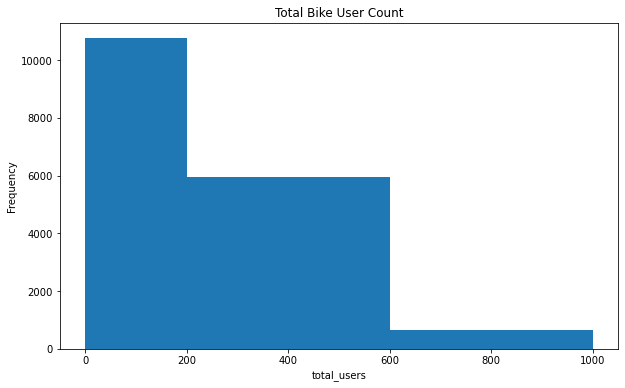

In [22]:
# Visualizing Total User Count for feature engineering
plt.figure(figsize=(10,6))
plt.xlabel('total_users')
plt.title('Total Bike User Count')
df_classifier.total_users.plot.hist(bins=[0,200,600,1000])

In [23]:
# Feature Engineering (Creating 'Low', 'Moderate' and 'High' User Traffic from User Count)
df_classifier['user_traffic'] = ''

for i in range(len(df_classifier)):
    temp = df_classifier['total_users'][i]

    if temp < 200:
        df_classifier['user_traffic'][i] = 'Low'
    elif temp < 600:
        df_classifier['user_traffic'][i] = 'Moderate'
    else:
        df_classifier['user_traffic'][i] = 'High'

df_classifier.drop(columns=['total_users'], inplace=True)
df_classifier = pd.concat([df_classifier.pop('user_traffic'),df_classifier], axis=1)

print(df_classifier['user_traffic'].value_counts())
df_classifier

Low         10763
Moderate     5949
High          667
Name: user_traffic, dtype: int64


user_traffic  hour  is_holiday  day_of_week  is_working_day  \
0              Low     0           0            6               0   
1              Low     1           0            6               0   
2              Low     2           0            6               0   
3              Low     3           0            6               0   
4              Low     4           0            6               0   
...            ...   ...         ...          ...             ...   
17374          Low    19           0            1               1   
17375          Low    20           0            1               1   
17376          Low    21           0            1               1   
17377          Low    22           0            1               1   
17378          Low    23           0            1               1   

       weather_type  temp  humidity  wind_speed  
0                 1  0.24      0.81      0.0000  
1                 1  0.22      0.80      0.0000  
2                 1  0.22      0.80      0.0000  
3                 1  0.24      0.75      0.0000  
4                 1  0.24      0.75      0.0000  
...             ...   ...       ...         ...  
17374             2  0.26      0.60      0.1642  
17375             2  0.26      0.60      0.1642  
17376             1  0.26      0.60      0.1642  
17377             1  0.26      0.56      0.1343  
17378             1  0.26      0.65      0.1343  

[17379 rows x 9 columns]

In [24]:
# Creating categorical dummy variables
cat_vars = list(df_classifier.columns)[1:-3]
num_vars = list(df_classifier.columns)[-3:]

quantitative_data = df_classifier[num_vars].copy()
categorical_data = df_classifier[cat_vars].copy()
categorical_data.astype('category')

dummy = pd.get_dummies(categorical_data, columns=list(categorical_data.columns))
df_classifier = pd.concat([df_classifier[['user_traffic']],quantitative_data,dummy],axis=1)
df_classifier

user_traffic  temp  humidity  wind_speed  hour_0  hour_1  hour_2  \
0              Low  0.24      0.81      0.0000       1       0       0   
1              Low  0.22      0.80      0.0000       0       1       0   
2              Low  0.22      0.80      0.0000       0       0       1   
3              Low  0.24      0.75      0.0000       0       0       0   
4              Low  0.24      0.75      0.0000       0       0       0   
...            ...   ...       ...         ...     ...     ...     ...   
17374          Low  0.26      0.60      0.1642       0       0       0   
17375          Low  0.26      0.60      0.1642       0       0       0   
17376          Low  0.26      0.60      0.1642       0       0       0   
17377          Low  0.26      0.56      0.1343       0       0       0   
17378          Low  0.26      0.65      0.1343       0       0       0   

       hour_3  hour_4  hour_5  ...  day_of_week_3  day_of_week_4  \
0           0       0       0  ...              0              0   
1           0       0       0  ...              0              0   
2           0       0       0  ...              0              0   
3           1       0       0  ...              0              0   
4           0       1       0  ...              0              0   
...       ...     ...     ...  ...            ...            ...   
17374       0       0       0  ...              0              0   
17375       0       0       0  ...              0              0   
17376       0       0       0  ...              0              0   
17377       0       0       0  ...              0              0   
17378       0       0       0  ...              0              0   

       day_of_week_5  day_of_week_6  is_working_day_0  is_working_day_1  \
0                  0              1                 1                 0   
1                  0              1                 1                 0   
2                  0              1                 1                 0   
3                  0              1                 1                 0   
4                  0              1                 1                 0   
...              ...            ...               ...               ...   
17374              0              0                 0                 1   
17375              0              0                 0                 1   
17376              0              0                 0                 1   
17377              0              0                 0                 1   
17378              0              0                 0                 1   

       weather_type_1  weather_type_2  weather_type_3  weather_type_4  
0                   1               0               0               0  
1                   1               0               0               0  
2                   1               0               0               0  
3                   1               0               0               0  
4                   1               0               0               0  
...               ...             ...             ...             ...  
17374               0               1               0               0  
17375               0               1               0               0  
17376               1               0               0               0  
17377               1               0               0               0  
17378               1               0               0               0  

[17379 rows x 43 columns]

In [25]:
# Split train and test set for classification cross validation
x = df_classifier.iloc[:,1:].copy()
y = df_classifier.iloc[:,0:1].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42)

### K-NN Classification

In [26]:
# K-NN Classification
classifier_comparison = []

knn_classifier = KNeighborsClassifier(n_neighbors=10,
                                      weights='distance',
                                      algorithm='auto',
                                      p=2,
                                      n_jobs=-1)

knn_classifier.fit(x_train, y_train)

print('Accuracy of fit =', knn_classifier.score(x_train, y_train))
print('Accuracy of prediction =', knn_classifier.score(x_test, y_test), '\n')
classifier_comparison.append(knn_classifier.score(x_test, y_test))

tab = pd.crosstab(knn_classifier.predict(x_test), y_test['user_traffic'], margins=True)
tab.index.name = 'Prediction'
tab

Accuracy of fit = 0.9991779695848746
Accuracy of prediction = 0.825469888761028 



user_traffic  High   Low  Moderate   All
Prediction                              
High            63     0        79   142
Low              1  2862       282  3145
Moderate       116   432      1379  1927
All            180  3294      1740  5214

### Decision Tree Classification

In [27]:
# Decision Tree Classification
decision_tree_classifier = DecisionTreeClassifier(criterion='gini',
                                                  splitter='best',
                                                  random_state=42)

decision_tree_classifier.fit(x_train, y_train)

print('Accuracy of Fit (Decision Tree) =', decision_tree_classifier.score(x_train, y_train))
print('Accuracy of Prediction (Decision Tree) =', decision_tree_classifier.score(x_test, y_test), '\n')
classifier_comparison.append(decision_tree_classifier.score(x_test, y_test))

tab2 = pd.crosstab(decision_tree_classifier.predict(x_test), y_test['user_traffic'], margins=True)
tab2.index.name = 'Prediction'
tab2

Accuracy of Fit (Decision Tree) = 0.9991779695848746
Accuracy of Prediction (Decision Tree) = 0.8091676256233218 



user_traffic  High   Low  Moderate   All
Prediction                              
High            81     4       120   205
Low              1  2881       363  3245
Moderate        98   409      1257  1764
All            180  3294      1740  5214

### Decision Tree Classification (with Pruning)

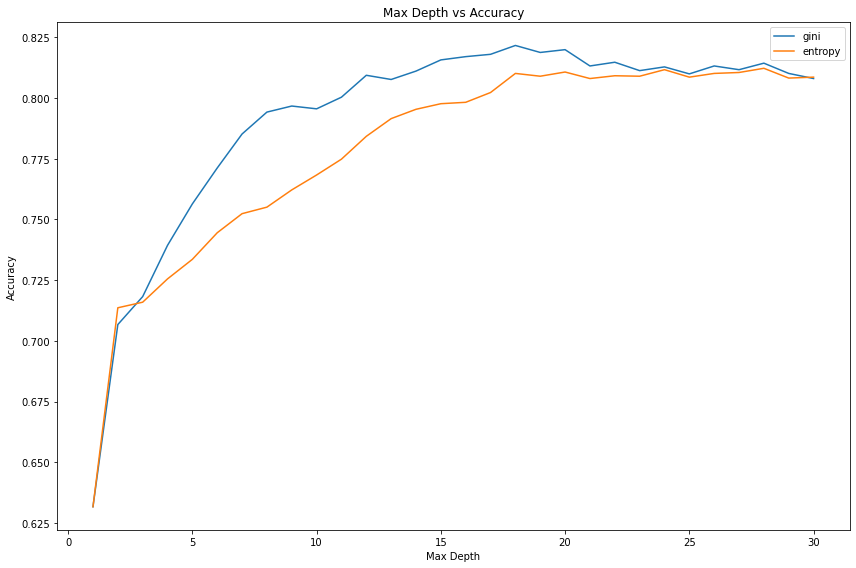

In [28]:
# Tuning Max Depth hyperparameter to reduce model complexity and determining 'gini' vs 'entropy' criterion
# for best model performance
gini_accuracy = []
entropy_accuracy = []
depth_range = np.arange(1,31)

for i in depth_range:
    dt_classifier = DecisionTreeClassifier(criterion='gini',
                                           splitter='best',
                                           max_depth=i,
                                           random_state=42)
    dt_classifier.fit(x_train, y_train)
    g_acc = dt_classifier.score(x_test, y_test)
    gini_accuracy.append(g_acc)

    dt_classifier = DecisionTreeClassifier(criterion='entropy',
                                           splitter='best',
                                           max_depth=i,
                                           random_state=42)
    dt_classifier.fit(x_train, y_train)
    e_acc = dt_classifier.score(x_test, y_test)
    entropy_accuracy.append(e_acc)

plt.figure(figsize=(12,8))
plt.plot(depth_range, gini_accuracy, label='gini')
plt.plot(depth_range, entropy_accuracy, label='entropy')
plt.title('Max Depth vs Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# Comparing Accuracy Scores across both models for different Max Depth levels
df_pruning = pd.DataFrame({'Max Depth':depth_range,
                           'Gini Accuracy':gini_accuracy,
                           'Entropy Accuracy':entropy_accuracy})
df_pruning

Max Depth  Gini Accuracy  Entropy Accuracy
0           1       0.631761          0.631761
1           2       0.706751          0.713656
2           3       0.718259          0.715957
3           4       0.739356          0.725547
4           5       0.756425          0.733602
5           6       0.771193          0.744534
6           7       0.785194          0.752397
7           8       0.794208          0.755082
8           9       0.796701          0.762179
9          10       0.795550          0.768316
10         11       0.800345          0.774837
11         12       0.809359          0.784235
12         13       0.807633          0.791523
13         14       0.811086          0.795359
14         15       0.815689          0.797660
15         16       0.817031          0.798236
16         17       0.817990          0.802263
17         18       0.821634          0.810127
18         19       0.818757          0.808976
19         20       0.819908          0.810702
20         21       0.813195          0.808017
21         22       0.814730          0.809168
22         23       0.811277          0.808976
23         24       0.812812          0.811661
24         25       0.809935          0.808592
25         26       0.813195          0.810127
26         27       0.811661          0.810510
27         28       0.814346          0.812236
28         29       0.810127          0.808209
29         30       0.808017          0.808592

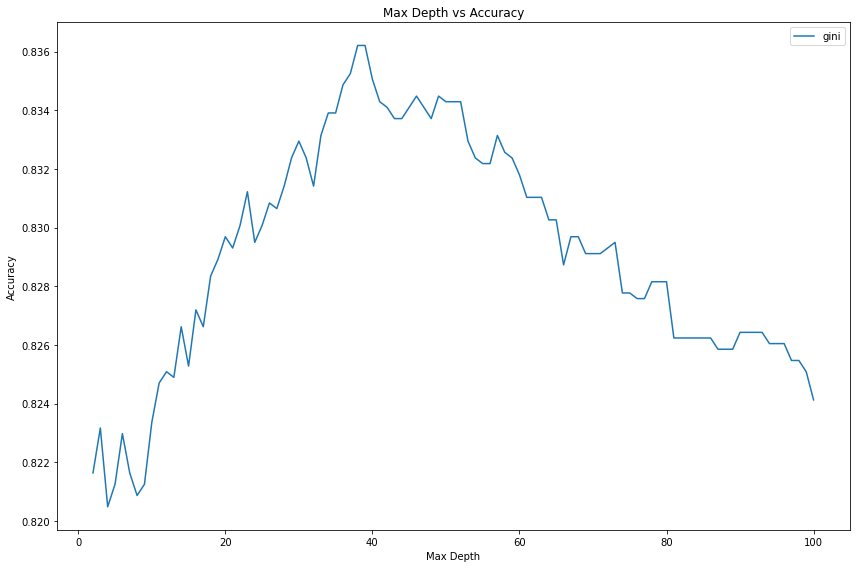

In [30]:
# Tuning Minimum Samples required for a split to prevent model overfitting
gini_accuracy2 = []
min_split_range = np.arange(2,101)

for i in min_split_range:
    dt_classifier = DecisionTreeClassifier(criterion='gini',
                                           splitter='best',
                                           max_depth=18,
                                           min_samples_split=i,
                                           random_state=42)
    dt_classifier.fit(x_train, y_train)
    g_acc = dt_classifier.score(x_test, y_test)
    gini_accuracy2.append(g_acc)

plt.figure(figsize=(12,8))
plt.plot(min_split_range, gini_accuracy2, label='gini')
plt.title('Max Depth vs Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# Comparing Model Accuracy across different Minimum Samples levels
df_pruning2 = pd.DataFrame({'Minimum Splits':min_split_range,
                            'Gini Accuracy':gini_accuracy2})
df_pruning2.head(50)

Minimum Splits  Gini Accuracy
0                2       0.821634
1                3       0.823168
2                4       0.820483
3                5       0.821250
4                6       0.822977
5                7       0.821634
6                8       0.820867
7                9       0.821250
8               10       0.823360
9               11       0.824703
10              12       0.825086
11              13       0.824895
12              14       0.826621
13              15       0.825278
14              16       0.827196
15              17       0.826621
16              18       0.828347
17              19       0.828922
18              20       0.829689
19              21       0.829306
20              22       0.830073
21              23       0.831224
22              24       0.829498
23              25       0.830073
24              26       0.830840
25              27       0.830648
26              28       0.831415
27              29       0.832374
28              30       0.832950
29              31       0.832374
30              32       0.831415
31              33       0.833142
32              34       0.833909
33              35       0.833909
34              36       0.834868
35              37       0.835251
36              38       0.836210
37              39       0.836210
38              40       0.835059
39              41       0.834292
40              42       0.834100
41              43       0.833717
42              44       0.833717
43              45       0.834100
44              46       0.834484
45              47       0.834100
46              48       0.833717
47              49       0.834484
48              50       0.834292
49              51       0.834292

In [32]:
# Building Pruned Decision Tree
dt_pruned = DecisionTreeClassifier(criterion='gini',
                                   splitter='best',
                                   max_depth=18,
                                   min_samples_split=39,
                                   random_state=42)
dt_pruned.fit(x_train, y_train)

print('Accuracy of Fit (Decision Tree with Pruning) =', dt_pruned.score(x_train, y_train))
print('Accuracy of Prediction (Decision Tree with Pruning) =', dt_pruned.score(x_test, y_test), '\n')
classifier_comparison.append(dt_pruned.score(x_test, y_test))

tab3 = pd.crosstab(dt_pruned.predict(x_test), y_test['user_traffic'], margins=True)
tab3.index.name = 'Prediction'
tab3

Accuracy of Fit (Decision Tree with Pruning) = 0.8461981093300452
Accuracy of Prediction (Decision Tree with Pruning) = 0.8362102032988109 



user_traffic  High   Low  Moderate   All
Prediction                              
High            70     0        69   139
Low              1  2892       273  3166
Moderate       109   402      1398  1909
All            180  3294      1740  5214

Classify 'user_traffic' with 17379 classes ['High', 'Low', 'Moderate']


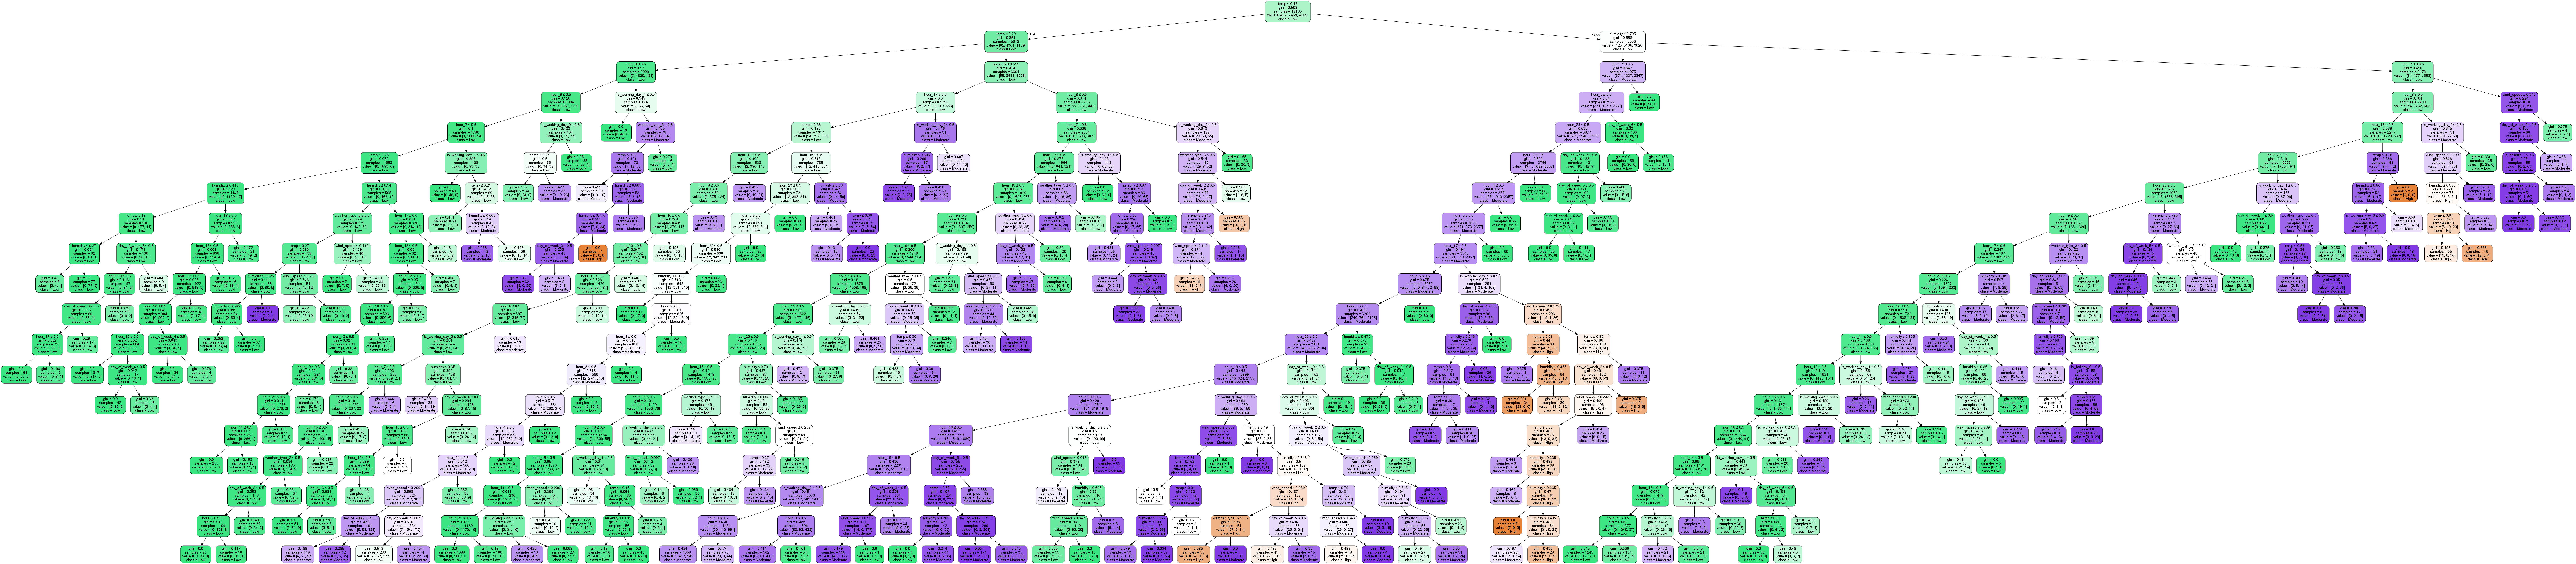

In [33]:
# Decision Tree Visualization
target_classes = sorted(list(df_classifier.user_traffic.value_counts().index))

dot_data = export_graphviz(dt_pruned,
                           feature_names=list(df_classifier.columns)[1:],
                           class_names=target_classes,
                           label='all',
                           filled=True,
                           impurity=True,
                           rounded=True,
                           special_characters=True,
                           precision=3)

(graph,) = pydot.graph_from_dot_data(dot_data)

print('Classify \''+list(df_classifier.columns)[0]+'\' with',
      len(df_classifier),
      'classes',
      str(target_classes))

Image(graph.create_png())

In [34]:
# Comparison of Classification Model Accuracy
df_accuracy = pd.DataFrame({'Accuracy':classifier_comparison}, index=['K-NN Classification',
                                                                      'Decision Tree Classification',
                                                                      'Decision Tree Classification (with Pruning)'])
df_accuracy

Accuracy
K-NN Classification                          0.825470
Decision Tree Classification                 0.809168
Decision Tree Classification (with Pruning)  0.836210

## Clustering Analysis

### Clustering Data Preparation

In [35]:
# Data preparation
df_cluster = df_master.copy()
df_cluster.dropna(axis=0, how='any', inplace=True)
df_cluster.reset_index(drop=True, inplace=True)
df_cluster.drop(columns=['temp'], inplace=True)

for col in ['casual','registered']:
    df_cluster[col] = df_cluster[col].astype('int64')

df_cluster['weather_type'] = df_cluster['weather_type'].astype('int64')
df_cluster.drop(columns=['time'], inplace=True)
df_cluster

season  year  month  day  hour  is_holiday  day_of_week  \
0           1     0      1    1     0           0            6   
1           1     0      1    1     1           0            6   
2           1     0      1    1     2           0            6   
3           1     0      1    1     3           0            6   
4           1     0      1    1     4           0            6   
...       ...   ...    ...  ...   ...         ...          ...   
17374       1     1     12   31    19           0            1   
17375       1     1     12   31    20           0            1   
17376       1     1     12   31    21           0            1   
17377       1     1     12   31    22           0            1   
17378       1     1     12   31    23           0            1   

       is_working_day  weather_type  app_temp  humidity  wind_speed  casual  \
0                   0             1    0.2879      0.81      0.0000       3   
1                   0             1    0.2727      0.80      0.0000       8   
2                   0             1    0.2727      0.80      0.0000       5   
3                   0             1    0.2879      0.75      0.0000       3   
4                   0             1    0.2879      0.75      0.0000       0   
...               ...           ...       ...       ...         ...     ...   
17374               1             2    0.2576      0.60      0.1642      11   
17375               1             2    0.2576      0.60      0.1642       8   
17376               1             1    0.2576      0.60      0.1642       7   
17377               1             1    0.2727      0.56      0.1343      13   
17378               1             1    0.2727      0.65      0.1343      12   

       registered  
0              13  
1              32  
2              27  
3              10  
4               1  
...           ...  
17374         108  
17375          81  
17376          83  
17377          48  
17378          37  

[17379 rows x 14 columns]

In [36]:
# Selecting features for Clustering
x = df_cluster.loc[:,'app_temp':'wind_speed'].copy()
x

app_temp  humidity  wind_speed
0        0.2879      0.81      0.0000
1        0.2727      0.80      0.0000
2        0.2727      0.80      0.0000
3        0.2879      0.75      0.0000
4        0.2879      0.75      0.0000
...         ...       ...         ...
17374    0.2576      0.60      0.1642
17375    0.2576      0.60      0.1642
17376    0.2576      0.60      0.1642
17377    0.2727      0.56      0.1343
17378    0.2727      0.65      0.1343

[17379 rows x 3 columns]

### Elbow Method

Cluster(s) = 1, WCSS = 1420.1570787428068
Cluster(s) = 2, WCSS = 933.6838657101664
Cluster(s) = 3, WCSS = 660.1578078569673
Cluster(s) = 4, WCSS = 551.4199585520407
Cluster(s) = 5, WCSS = 487.0134426350962
Cluster(s) = 6, WCSS = 439.787541999362
Cluster(s) = 7, WCSS = 402.54604954533
Cluster(s) = 8, WCSS = 368.6308448952939
Cluster(s) = 9, WCSS = 341.1699757880593
Cluster(s) = 10, WCSS = 319.7318889442379


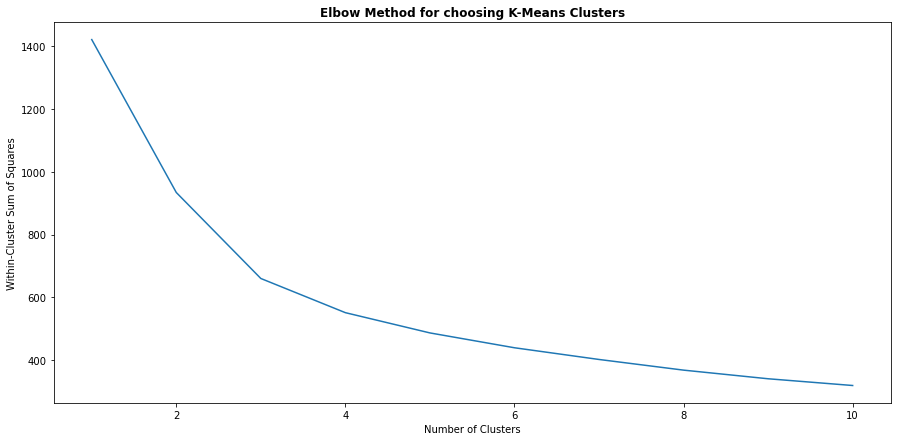

In [37]:
# Elbow Method for K-Means Clustering
cluster_range = np.arange(1,11)
wcss_list = []

for i in cluster_range:
    k_means = KMeans(n_clusters=i,
                     init='k-means++',
                     copy_x=True,
                     n_jobs=-1,
                     random_state=42)
    k_means.fit(x)
    print('Cluster(s) =',str(i)+',','WCSS =',k_means.inertia_)
    wcss_list.append(k_means.inertia_)

plt.rcParams['figure.figsize'] = 15, 7
plt.plot(cluster_range, wcss_list)
plt.title('Elbow Method for choosing K-Means Clusters', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

### K-Means Clustering

In [38]:
# Performing K-Means Clustering with 3 clusters
k_means = KMeans(n_clusters=3,
                 init='k-means++',
                 copy_x=True,
                 n_jobs=-1,
                 random_state=42)
cluster_pred = pd.Series(k_means.fit_predict(x))

cluster_results = pd.DataFrame({'Cluster':cluster_pred.values})
cluster_results = pd.concat([df_cluster,cluster_results], axis=1)

print(cluster_results.Cluster.value_counts())
cluster_results

1    7303
0    5119
2    4957
Name: Cluster, dtype: int64


season  year  month  day  hour  is_holiday  day_of_week  \
0           1     0      1    1     0           0            6   
1           1     0      1    1     1           0            6   
2           1     0      1    1     2           0            6   
3           1     0      1    1     3           0            6   
4           1     0      1    1     4           0            6   
...       ...   ...    ...  ...   ...         ...          ...   
17374       1     1     12   31    19           0            1   
17375       1     1     12   31    20           0            1   
17376       1     1     12   31    21           0            1   
17377       1     1     12   31    22           0            1   
17378       1     1     12   31    23           0            1   

       is_working_day  weather_type  app_temp  humidity  wind_speed  casual  \
0                   0             1    0.2879      0.81      0.0000       3   
1                   0             1    0.2727      0.80      0.0000       8   
2                   0             1    0.2727      0.80      0.0000       5   
3                   0             1    0.2879      0.75      0.0000       3   
4                   0             1    0.2879      0.75      0.0000       0   
...               ...           ...       ...       ...         ...     ...   
17374               1             2    0.2576      0.60      0.1642      11   
17375               1             2    0.2576      0.60      0.1642       8   
17376               1             1    0.2576      0.60      0.1642       7   
17377               1             1    0.2727      0.56      0.1343      13   
17378               1             1    0.2727      0.65      0.1343      12   

       registered  Cluster  
0              13        1  
1              32        1  
2              27        1  
3              10        1  
4               1        1  
...           ...      ...  
17374         108        2  
17375          81        2  
17376          83        2  
17377          48        2  
17378          37        2  

[17379 rows x 15 columns]

### Clusters Visualization

In [39]:
# Cluster Distribution
cluster_dist = cluster_results.groupby(by=['Cluster'], as_index=False)
cluster_dist = cluster_dist[['casual','registered']].sum()
cluster_dist

Cluster  casual  registered
0        0  378924     1221008
1        1  131529      809572
2        2  109564      642082

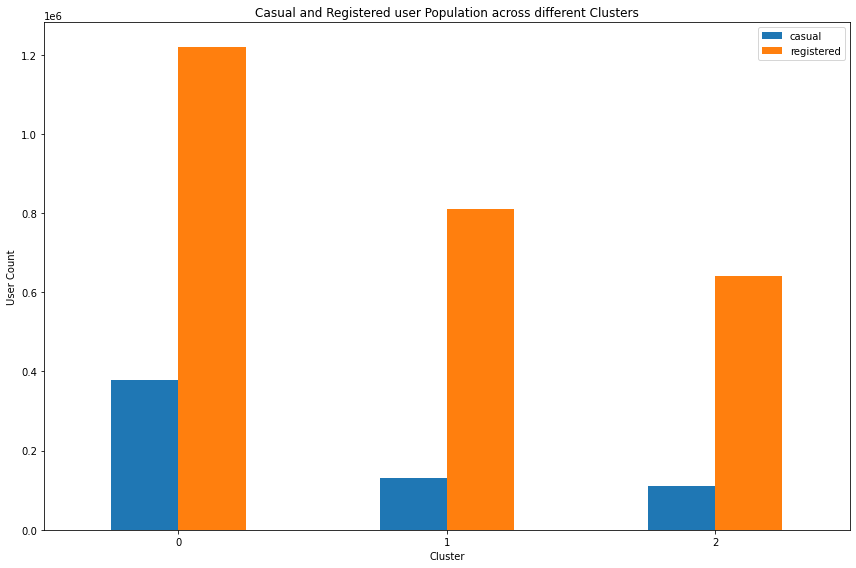

In [40]:
# Plotting Casual and Registered user distribution across different clusters
plt.rcParams['figure.figsize'] = 12, 8
cluster_dist.iloc[:,1:].plot.bar()
plt.title('Casual and Registered user Population across different Clusters')
plt.xticks(rotation=0)
plt.xlabel('Cluster')
plt.ylabel('User Count')
plt.tight_layout()
plt.show()

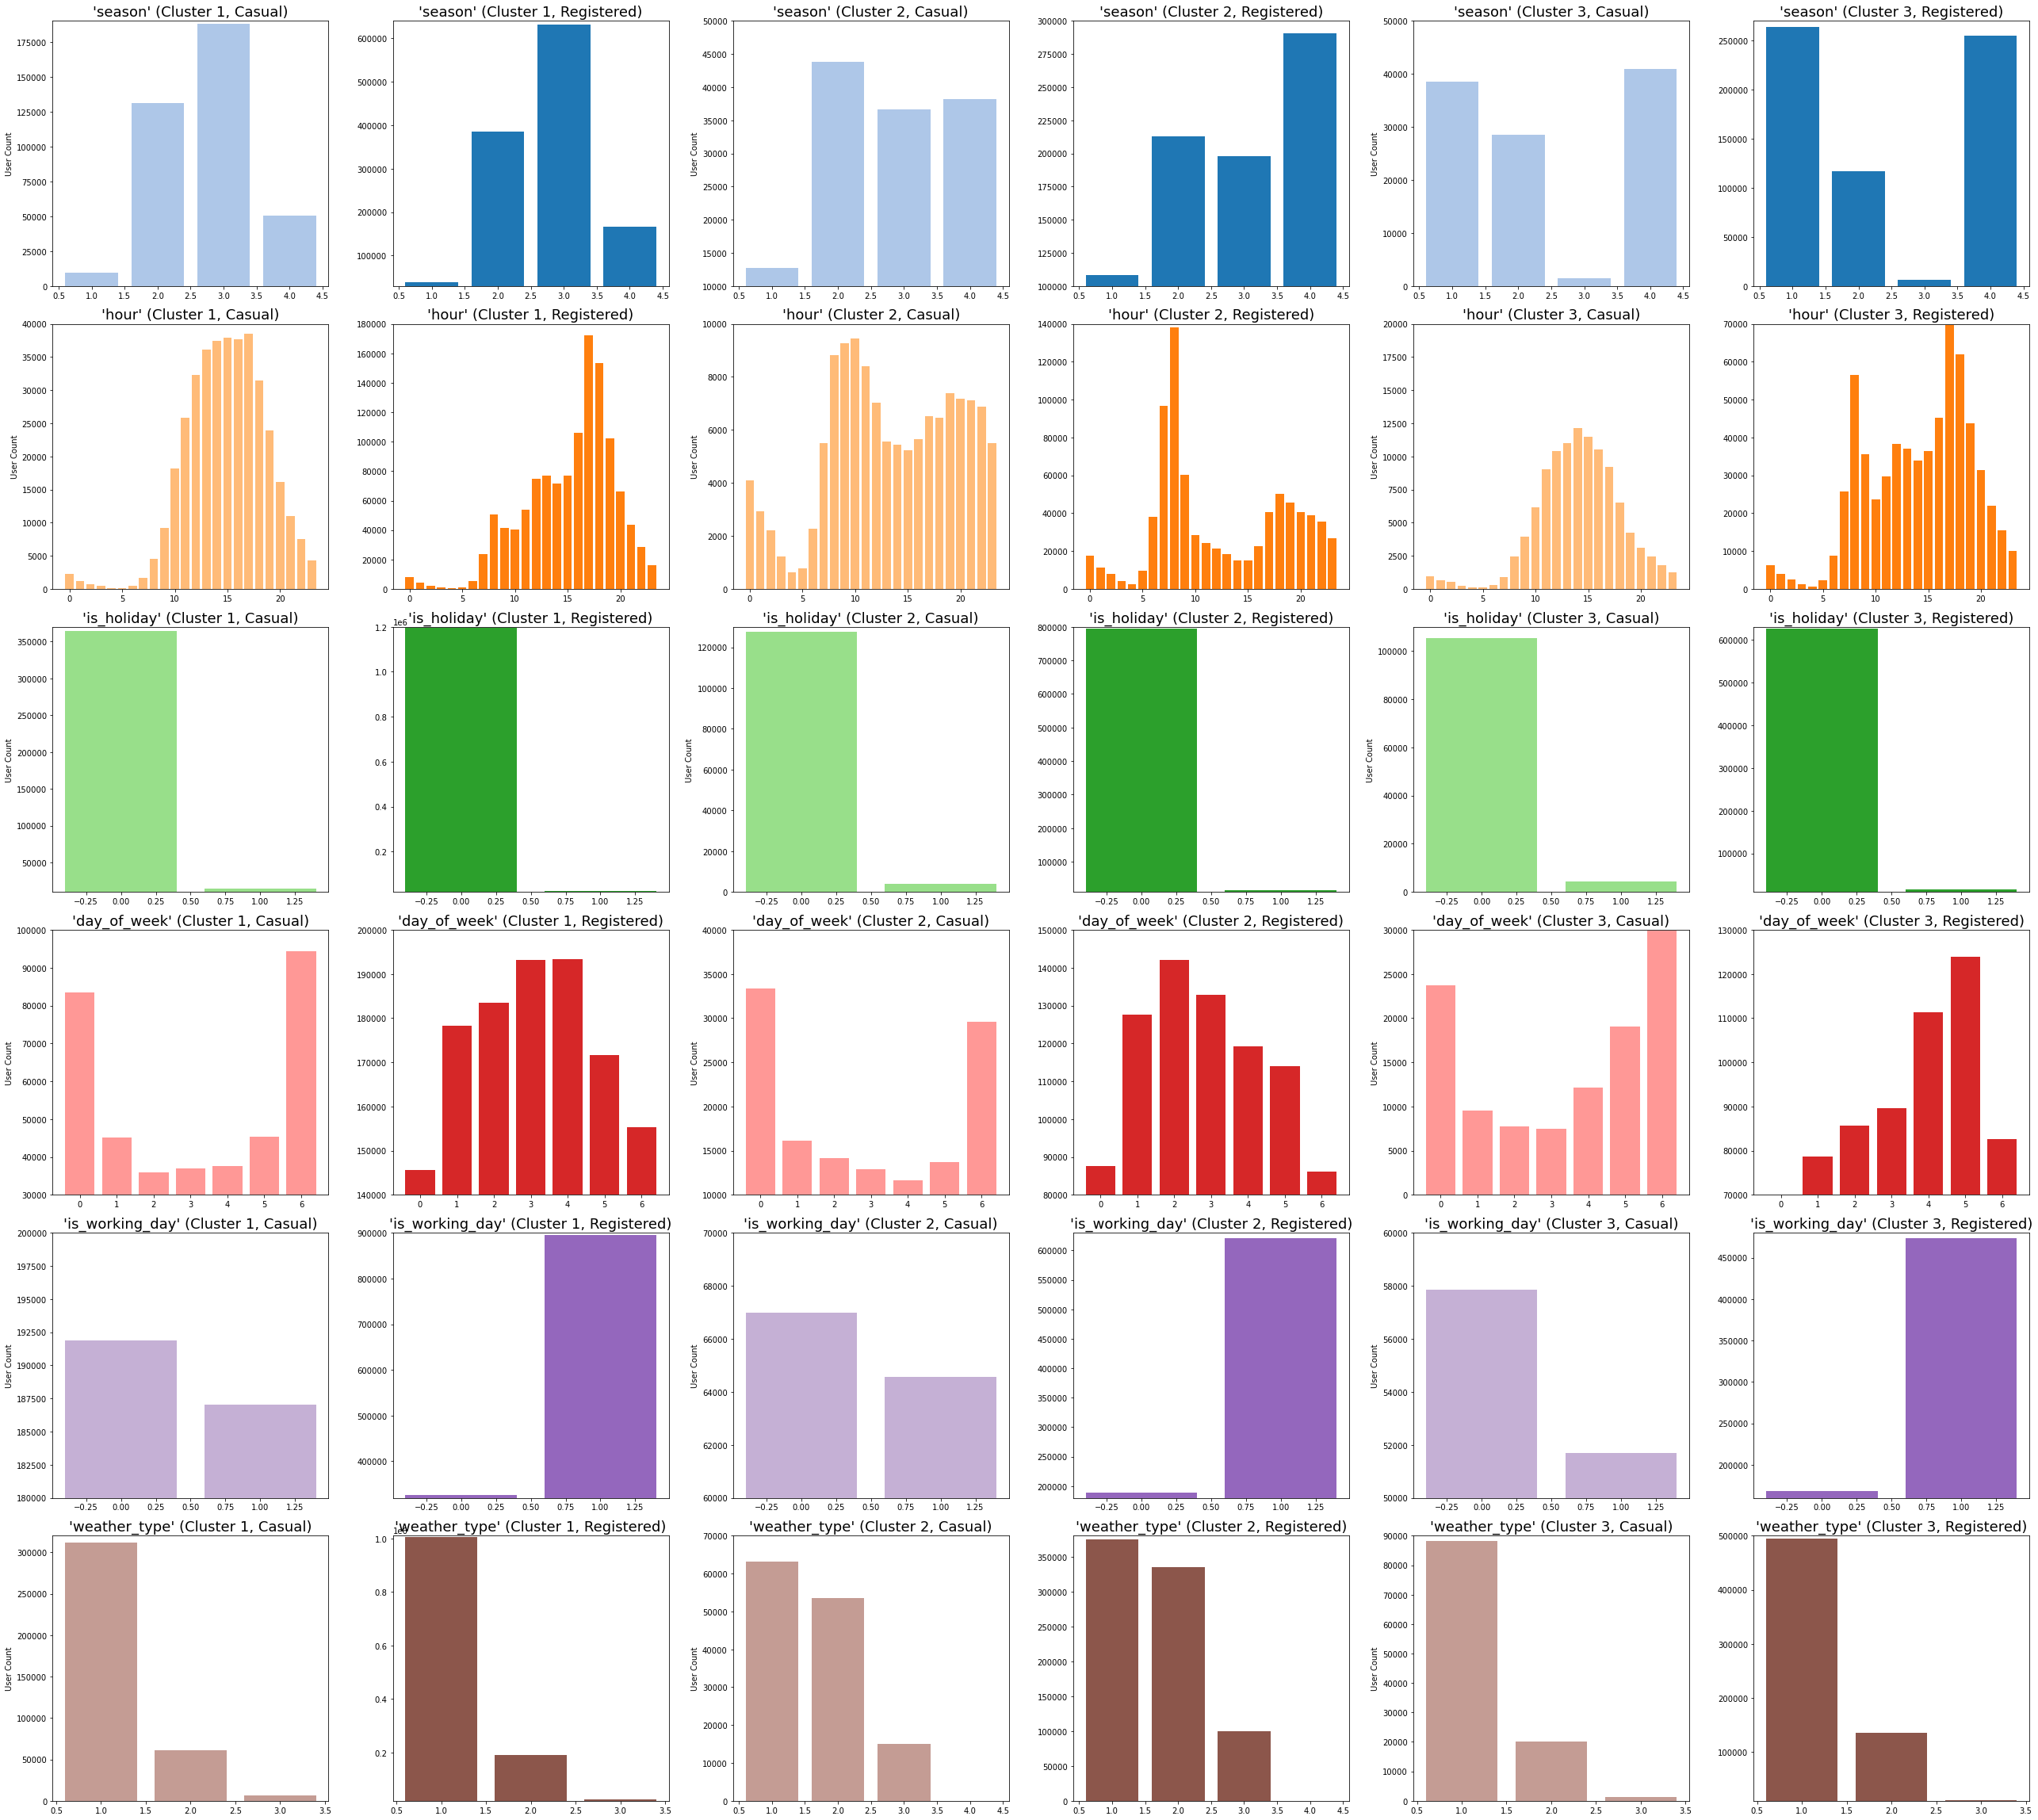

In [41]:
# Full Visualization of Cluster Features of Casual and Registered users
f, axes = plt.subplots(6, 6, figsize=(36, 32))

for k in range(3):
    temp = cluster_results[cluster_results['Cluster']==k]

    for i, col in enumerate(['season']+list(temp.columns)[4:9]):
        df_grouped = temp.groupby(by=[col], as_index=False)
        df_grouped = df_grouped[['casual','registered']].sum()
        
        axes[i,2*k].bar(x=df_grouped[col].tolist(), 
                    height=df_grouped['casual'].to_list(),
                    color=cm.tab20.colors[2*i+1])
        y_min = int(math.floor(np.min(df_grouped['casual'].to_list())/10000))*10000
        y_max = int(math.ceil(np.max(df_grouped['casual'].to_list())/10000))*10000
        axes[i,2*k].set_ylabel('User Count')
        axes[i,2*k].set_ylim([y_min, y_max])
        axes[i,2*k].set_title('\''+col+'\''+' (Cluster '+str(k+1)+', Casual)',
                              fontsize=18)
        
        axes[i,2*k+1].bar(x=df_grouped[col].tolist(), 
                    height=df_grouped['registered'].to_list(),
                    color=cm.tab20.colors[2*i])
        y_min = int(math.floor(np.min(df_grouped['registered'].to_list())/10000))*10000
        y_max = int(math.ceil(np.max(df_grouped['registered'].to_list())/10000))*10000
        axes[i,2*k+1].set_ylim([y_min, y_max])
        axes[i,2*k+1].set_title('\''+col+'\''+' (Cluster '+str(k+1)+', Registered)',
                                fontsize=18)

plt.subplots_adjust(wspace=0.05,hspace=0.05)
plt.tight_layout()
plt.show()

In [42]:
print('Total Notebook Runtime:',round((time.time()-master_tm)/60,2),'mins')

Total Notebook Runtime: 43.51 mins
